# Hidalgo and Hausmann (2009) metrics
In this notebooks we compute the metrics (Level 1 and 2) proposed by Hidalgo and Hausmann (2009), and we test their significance.


In [2]:
import sys

sys.path.insert(0, "../")

from scripts.hid_haus import hid_hous
import pandas as pd
import matplotlib.pyplot as plt
import scripts.features_extraction as fe
from scripts.plot_powerlaw import *
import numpy as np

## Compute the metrics

In [3]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv(
    "../../dataset/large_adjacency_matrix.csv", compression="gzip"
).values
data_onehot = pd.read_csv(
    "../../dataset/large_one_hot_encoding.csv", compression="gzip"
)

level = 2
[kd, ks] = hid_hous(adjacency_matrix, level)

## First level metrics (degree) distribution 

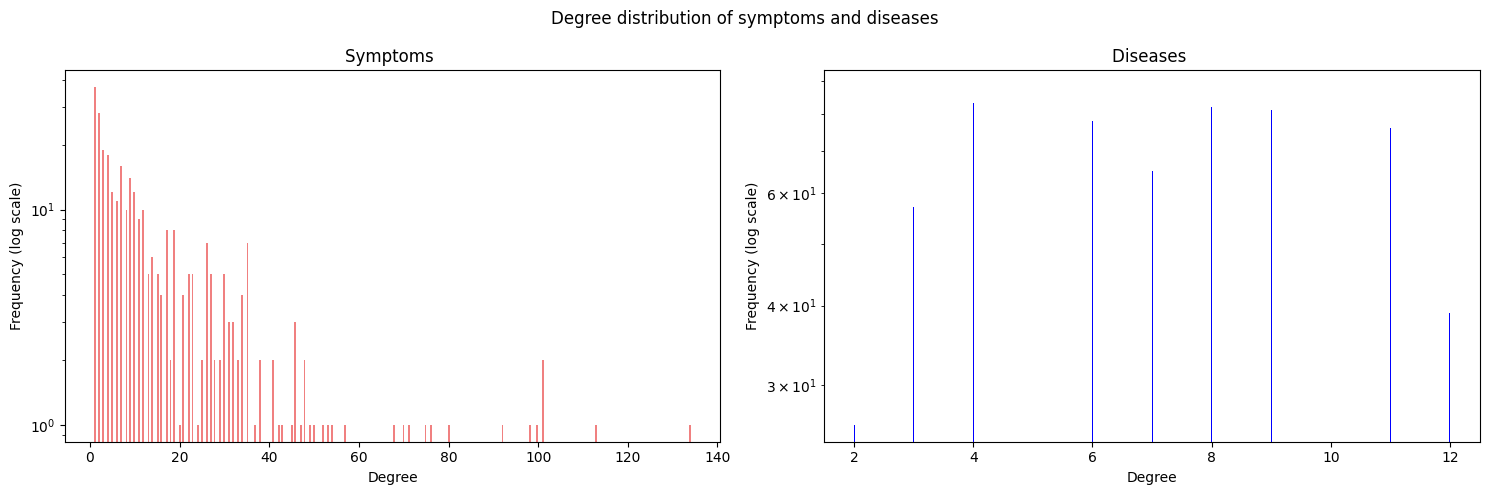

In [21]:
import matplotlib.pyplot as plt

# Assuming you have data for diseases in `kd` array

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the distribution of symptoms in the first subplot
ax1.hist(ks[:, 0], bins=ks.shape[0], log=True, color="lightcoral")
ax1.set_title("Symptoms ")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency (log scale)")

# Plot the distribution of diseases in the second subplot
ax2.hist(kd[:, 0], bins=kd.shape[0], log=True, color="blue")
ax2.set_title("Diseases ")  
ax2.set_xlabel("Degree")
ax2.set_ylabel("Frequency (log scale)")
plt.suptitle("Degree distribution of symptoms and diseases")
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

## Second level metrics distribution

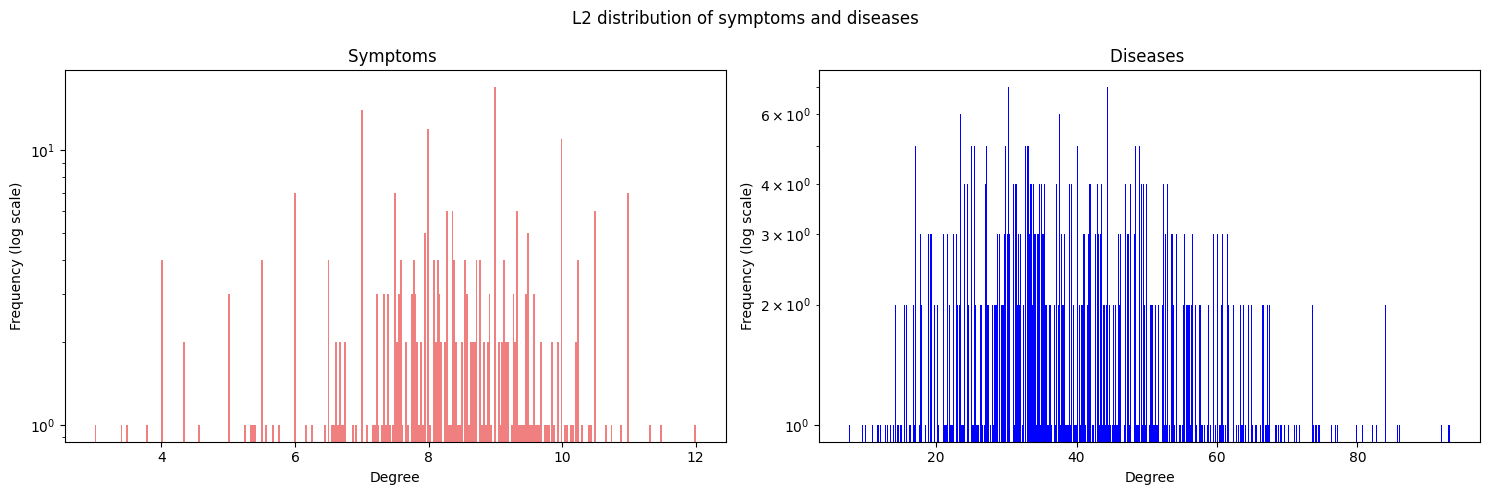

In [22]:
import matplotlib.pyplot as plt

# Assuming you have data for diseases in `kd` array

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the distribution of symptoms in the first subplot
ax1.hist(ks[:, 1], bins=ks.shape[0], log=True, color="lightcoral")
ax1.set_title("Symptoms ")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency (log scale)")

# Plot the distribution of diseases in the second subplot
ax2.hist(kd[:, 1], bins=kd.shape[0], log=True, color="blue")
ax2.set_title("Diseases ")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Frequency (log scale)")
plt.suptitle("L2 distribution of symptoms and diseases")
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

## Power Law Test L1

Some values were non-positive in your data.


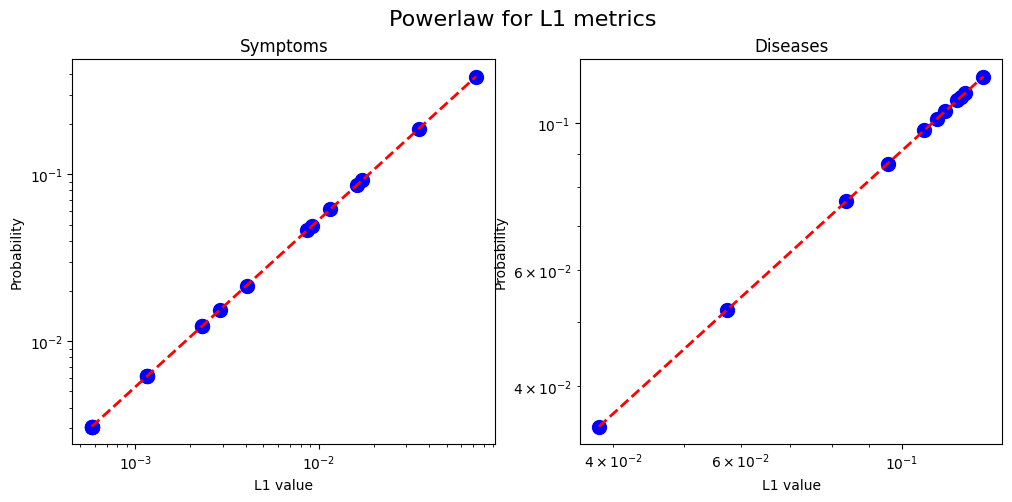

In [9]:
################# Symptoms #################
# Step 1: Create a histogram
x1, bin_edges = np.histogram(ks[:, 0], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf1 = x1 * bin_widths
y1 = pdf1 / np.sum(pdf1)

################# Diseases #################

# Step 1: Create a histogram
x2, bin_edges = np.histogram(kd[:, 0], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf2 = x2 * bin_widths
y2 = pdf2 / np.sum(pdf2)

############################################

# Create a figure with two subplots

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Powerlaw for L1 metrics", fontsize=16)

# Assuming plot_power_law_fit is defined or imported
slope, intercept = plot_power_law_fit(
    x1, y1, y_label="Probability", x_label="L1 value", title="Symptoms", axes=axes[0]
)

slope, intercept = plot_power_law_fit(
    x2, y2, y_label="Probability", x_label="L1 value", title="Diseases", axes=axes[1]
)

plt.show()

## Power Law Test L2

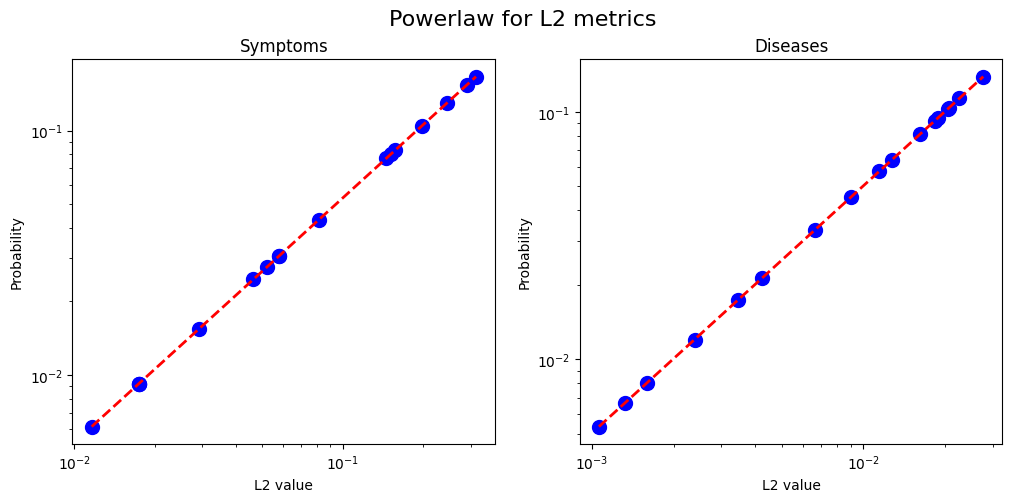

In [10]:
################# Symptoms #################
# Step 1: Create a histogram
x1, bin_edges = np.histogram(ks[:, 1], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf1 = x1 * bin_widths
y1 = pdf1 / np.sum(pdf1)

################# Diseases #################

# Step 1: Create a histogram
x2, bin_edges = np.histogram(kd[:, 1], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf2 = x2 * bin_widths
y2 = pdf2 / np.sum(pdf2)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Powerlaw for L2 metrics", fontsize=16)

# Assuming plot_power_law_fit is defined or imported
slope, intercept = plot_power_law_fit(
    x1, y1, y_label="Probability", x_label="L2 value", title="Symptoms", axes=axes[0]
)

slope, intercept = plot_power_law_fit(
    x2, y2, y_label="Probability", x_label="L2 value", title="Diseases", axes=axes[1]
)

plt.show()

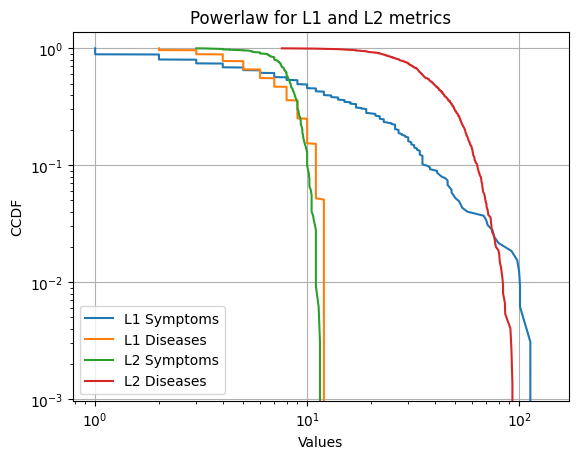

In [11]:
######################## L1 Symptoms ########################
data = ks[:, 0]
# Sort the data in ascending order
sorted_data_l1s = np.sort(data)

# Calculate the cumulative distribution function (CDF)
cdf = np.linspace(0, 1, len(sorted_data_l1s))

# Plot the CCDF (1 - CDF)
ccdf_l1s = 1 - cdf

######################## L1 Diseases ########################
data = kd[:, 0]
# Sort the data in ascending order
sorted_data_l1d = np.sort(data)

# Calculate the cumulative distribution function (CDF)
cdf = np.linspace(0, 1, len(sorted_data_l1d))

# Plot the CCDF (1 - CDF)
ccdf_l1d = 1 - cdf

######################## L2 Symptoms ########################
data = ks[:, 1]
# Sort the data in ascending order
sorted_data_l2s = np.sort(data)

# Calculate the cumulative distribution function (CDF)
cdf = np.linspace(0, 1, len(sorted_data_l2s))

# Plot the CCDF (1 - CDF)
ccdf_l2s = 1 - cdf

######################## L2 Diseases ########################
data = kd[:, 1]
# Sort the data in ascending order
sorted_data_l2d = np.sort(data)

# Calculate the cumulative distribution function (CDF)
cdf = np.linspace(0, 1, len(sorted_data_l2d))

# Plot the CCDF (1 - CDF)
ccdf_l2d = 1 - cdf

# Plotting
plt.plot(sorted_data_l1s, ccdf_l1s, linestyle="-", label="L1 Symptoms")
plt.plot(sorted_data_l1d, ccdf_l1d, linestyle="-", label="L1 Diseases")
plt.plot(sorted_data_l2s, ccdf_l2s, linestyle="-", label="L2 Symptoms")
plt.plot(sorted_data_l2d, ccdf_l2d, linestyle="-", label="L2 Diseases")

plt.xscale("log")  # Set x-axis to logarithmic scale
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.xlabel("Values")
plt.ylabel("CCDF")
plt.title("Powerlaw for L1 and L2 metrics")
plt.legend()
plt.grid(True)
plt.show()

## Assign to metrics values the corresponding symptom/disease name

<Axes: xlabel='Symptom'>

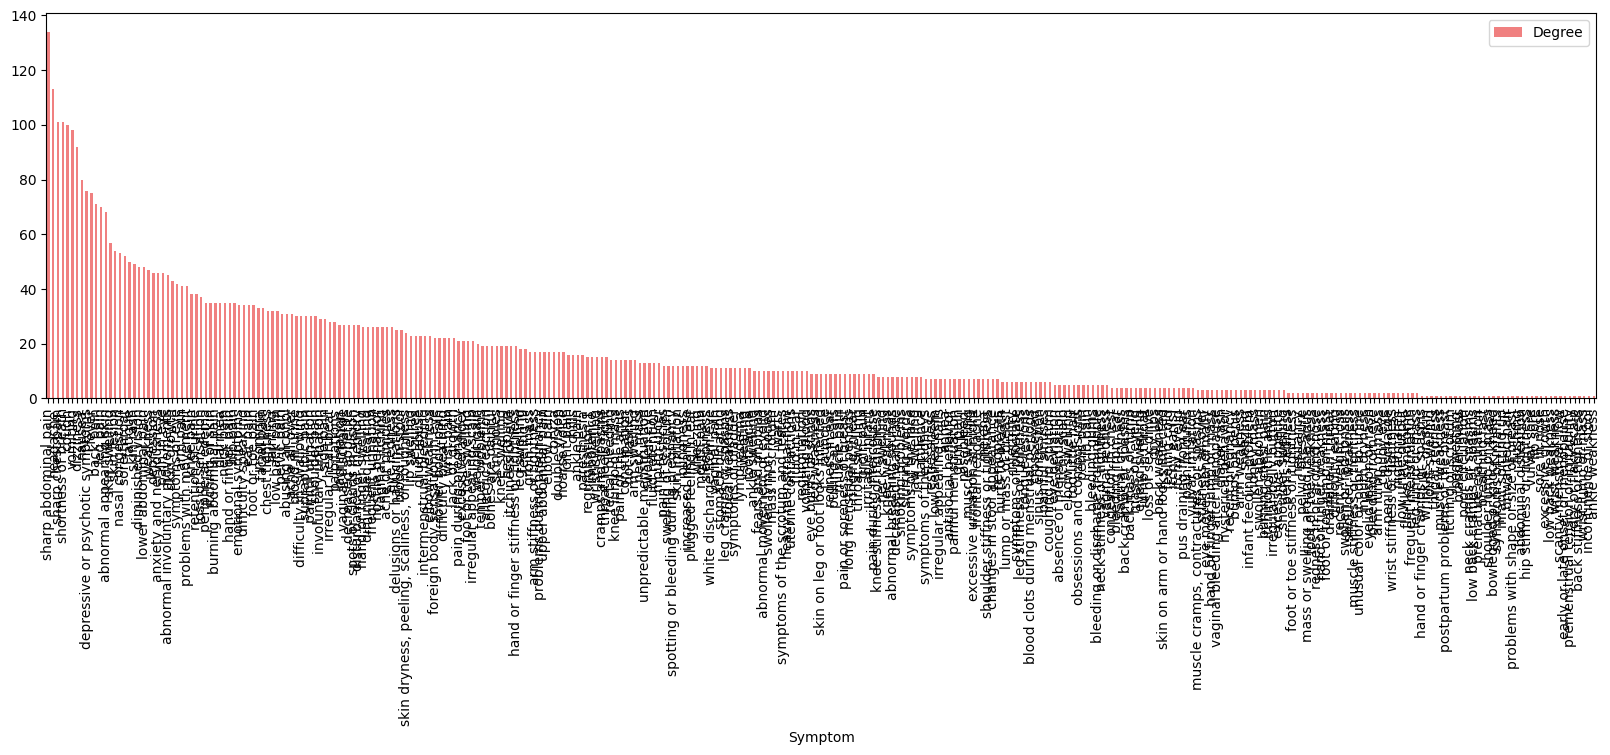

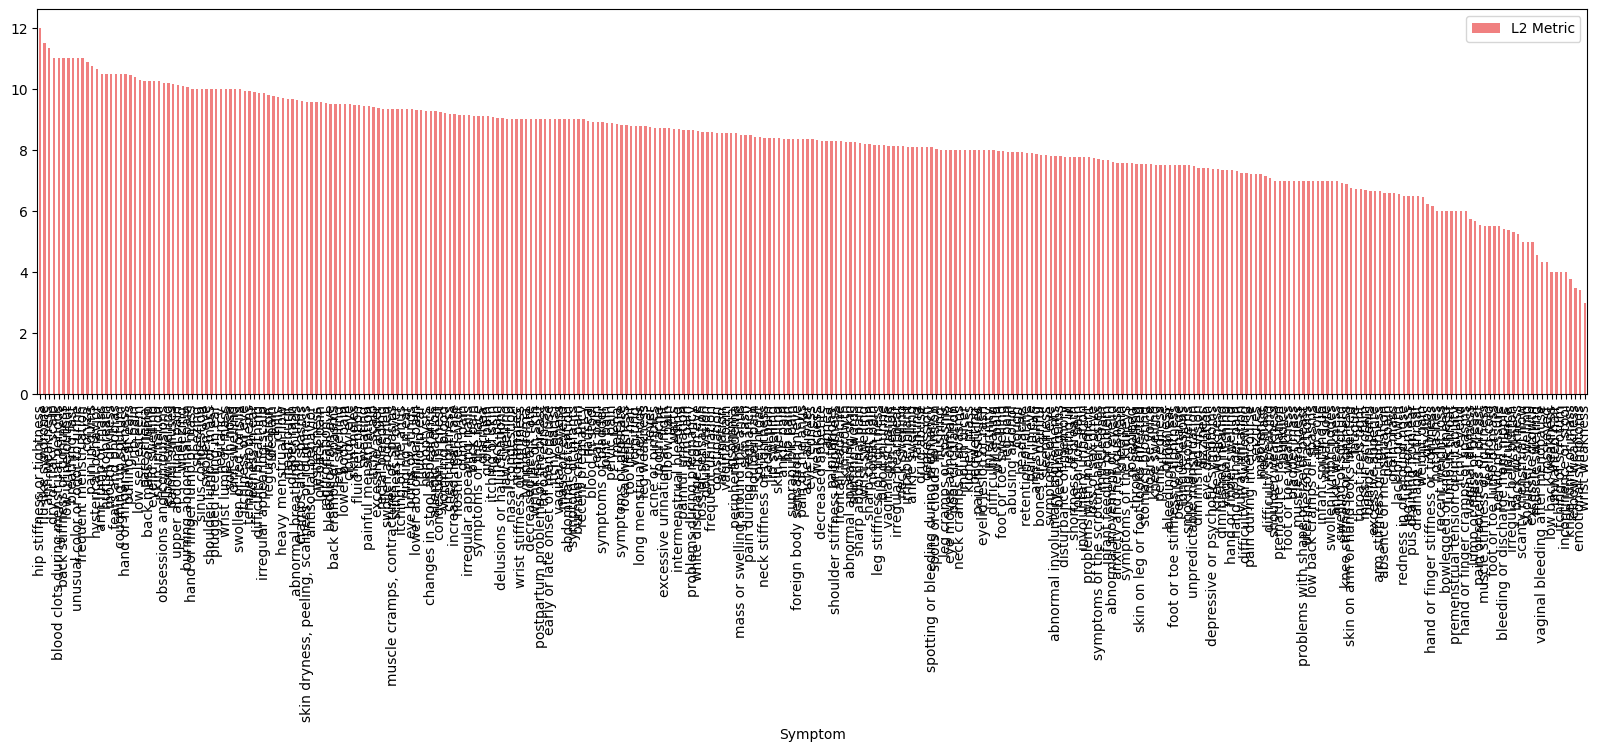

In [12]:
data_onehot = pd.read_csv(
    "../../dataset/large_one_hot_encoding.csv", compression="gzip"
)
names = data_onehot.columns.values.tolist()
names = names[1:-1]

# Sort the symptoms by degree
sorted_index = np.argsort(ks[:, 0])[::-1]
sorted_names = {names[i]: ks[i, 0] for i in sorted_index}
sorted_names_L1 = pd.DataFrame(sorted_names.items(), columns=["Symptom", "Degree"])
sorted_names_L1.plot.bar(x="Symptom", y="Degree", figsize=(20, 5), color="lightcoral")

# Sort the symptoms by L2
sorted_index = np.argsort(ks[:, 1])[::-1]
sorted_names = {names[i]: ks[i, 1] for i in sorted_index}
sorted_names_L2 = pd.DataFrame(sorted_names.items(), columns=["Symptom", "L2 Metric"])
sorted_names_L2.plot.bar(
    x="Symptom", y="L2 Metric", figsize=(20, 5), color="lightcoral"
)

## Compute features for the model

In [13]:
data_1 = np.load("../prediction_model/features/ks_level_1.npz")
x1, y1 = data_1["X"], data_1["y"]
print(x1.shape, y1.shape)

data_2 = np.load("../prediction_model/features/ks_level_2.npz")
x2, y2 = data_2["X"], data_2["y"]
print(x2.shape, y2.shape)

(246914, 325) (246914,)
(246914, 325) (246914,)


In [14]:
# For level 1
level = 1
ks_list = ks[:, level - 1].tolist()

x, y = fe.get_x_y(
    ks_list,
    data_onehot,
    store_path=f"../prediction_model/features/ks_level_{level}.npz",
)


# For level 2
level = 2
ks_list = ks[:, level - 1].tolist()

x, y = fe.get_x_y(
    ks_list,
    data_onehot,
    store_path=f"../prediction_model/features/ks_level_{level}.npz",
)

## Divide the data in 4 classes

#### Symptoms

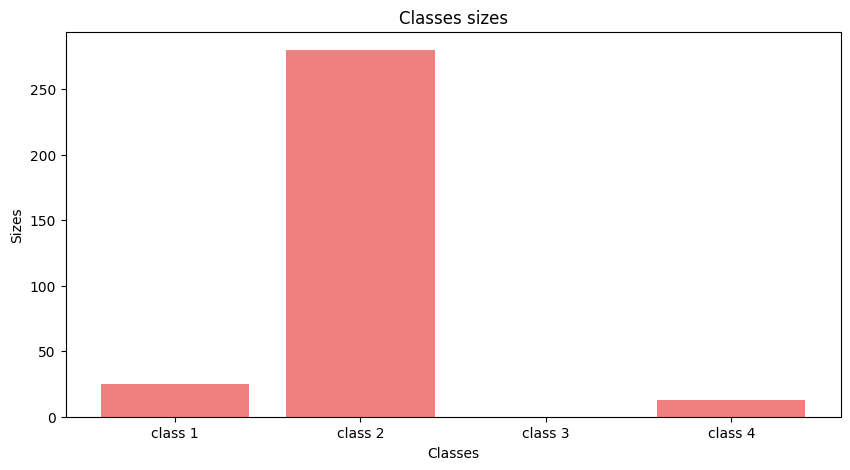

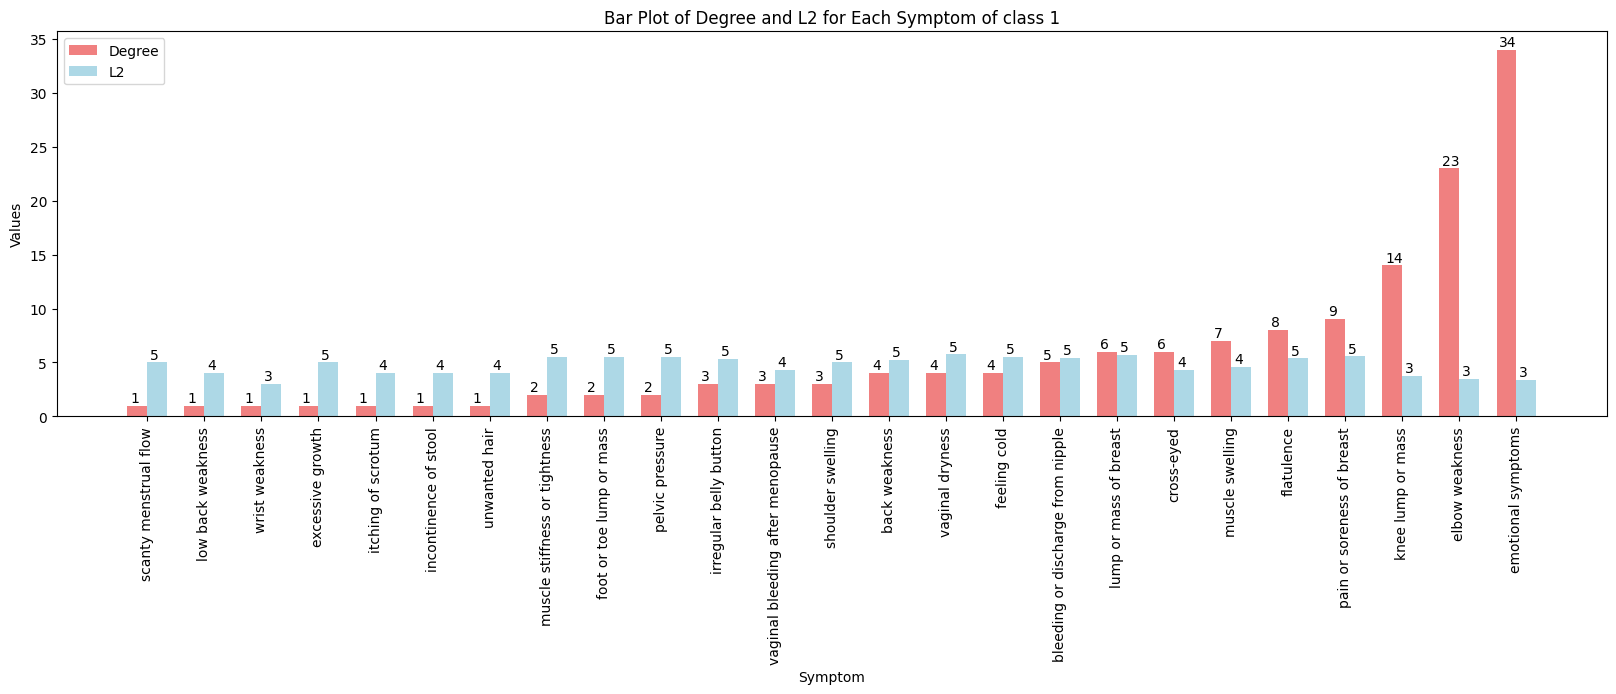

In [15]:
# set thresholds as hyperparameters
L1_threshold = ks[:, 0].max() * 0.5
L2_threshold = ks[:, 1].max() * 0.5

# class 1: ks[:,0] < L1_threshold and ks[:,1] < L2_threshold
class1_symptoms = np.where((ks[:, 0] < L1_threshold) & (ks[:, 1] < L2_threshold))[0]

# class 2: ks[:,0] < L1_threshold and ks[:,1] > L2_threshold
class2_symptoms = np.where((ks[:, 0] < L1_threshold) & (ks[:, 1] > L2_threshold))[0]

# class 3: ks[:,0] > L1_threshold and ks[:,1] < L2_threshold
class3_symptoms = np.where((ks[:, 0] > L1_threshold) & (ks[:, 1] < L2_threshold))[0]

# class 4: ks[:,0] > L1_threshold and ks[:,1] > L2_threshold
class4_symptoms = np.where((ks[:, 0] > L1_threshold) & (ks[:, 1] > L2_threshold))[0]

# compute the sizes and plot them
sizes = [
    class1_symptoms.shape[0],
    class2_symptoms.shape[0],
    class3_symptoms.shape[0],
    class4_symptoms.shape[0],
]
labels = ["class 1", "class 2", "class 3", "class 4"]
plt.figure(figsize=(10, 5))
plt.bar(labels, sizes, color="lightcoral")
plt.title("Classes sizes")
plt.xlabel("Classes")
plt.ylabel("Sizes")

# investigate most important symptoms
names_values = {names[i]: (ks[i, 0], ks[i, 1]) for i in class1_symptoms}

# Unpack the tuple into separate columns in the DataFrame
sorted_names = pd.DataFrame(
    names_values.values(), index=names_values.keys(), columns=["Degree", "L2"]
).sort_values(by="Degree", ascending=True)

# Plotting with two bars for each value
fig, ax = plt.subplots(figsize=(20, 5))
bar_width = 0.35
bar_positions = range(len(sorted_names))

degree_bars = ax.bar(
    bar_positions,
    sorted_names["Degree"],
    width=bar_width,
    color="lightcoral",
    label="Degree",
)
l2_bars = ax.bar(
    [pos + bar_width for pos in bar_positions],
    sorted_names["L2"],
    width=bar_width,
    color="lightblue",
    label="L2",
)

# Add values to each column in the plot
for bars in [degree_bars, l2_bars]:
    for i, v in enumerate(bars):
        plt.text(
            i - 0.3 + (bar_width / 2 if bars == degree_bars else 3 * bar_width / 2),
            v.get_height() + 0.35,
            int(v.get_height()),
            color="black",
            fontsize=10,
        )

# Customize plot
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(
    sorted_names.index, rotation=90
)  # Rotate x-axis tick labels by 90 degrees
ax.set_xlabel("Symptom")  # Add xlabel
ax.set_ylabel("Values")  # Add ylabel
ax.set_title("Bar Plot of Degree and L2 for Each Symptom of class 1")  # Add title
ax.legend()

# Show the plot
plt.show()

In [16]:
# check the name association
val_to_get = "cross-eyed"

# get the index of the symptom
index = np.where(np.array(names) == val_to_get)[0][0]

# check ks values
print(f"Degree: {ks[index, 0]}")
print(f"L2: {ks[index, 1]}")

Degree: 6.0
L2: 4.333333333333333


#### Diseases

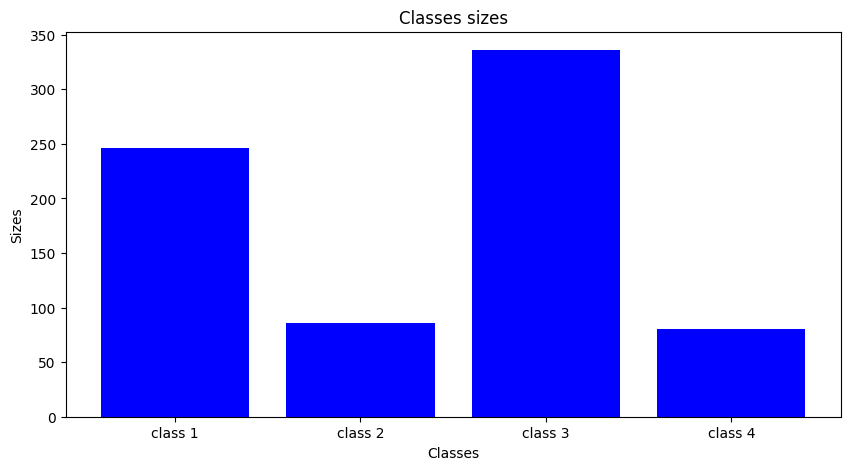

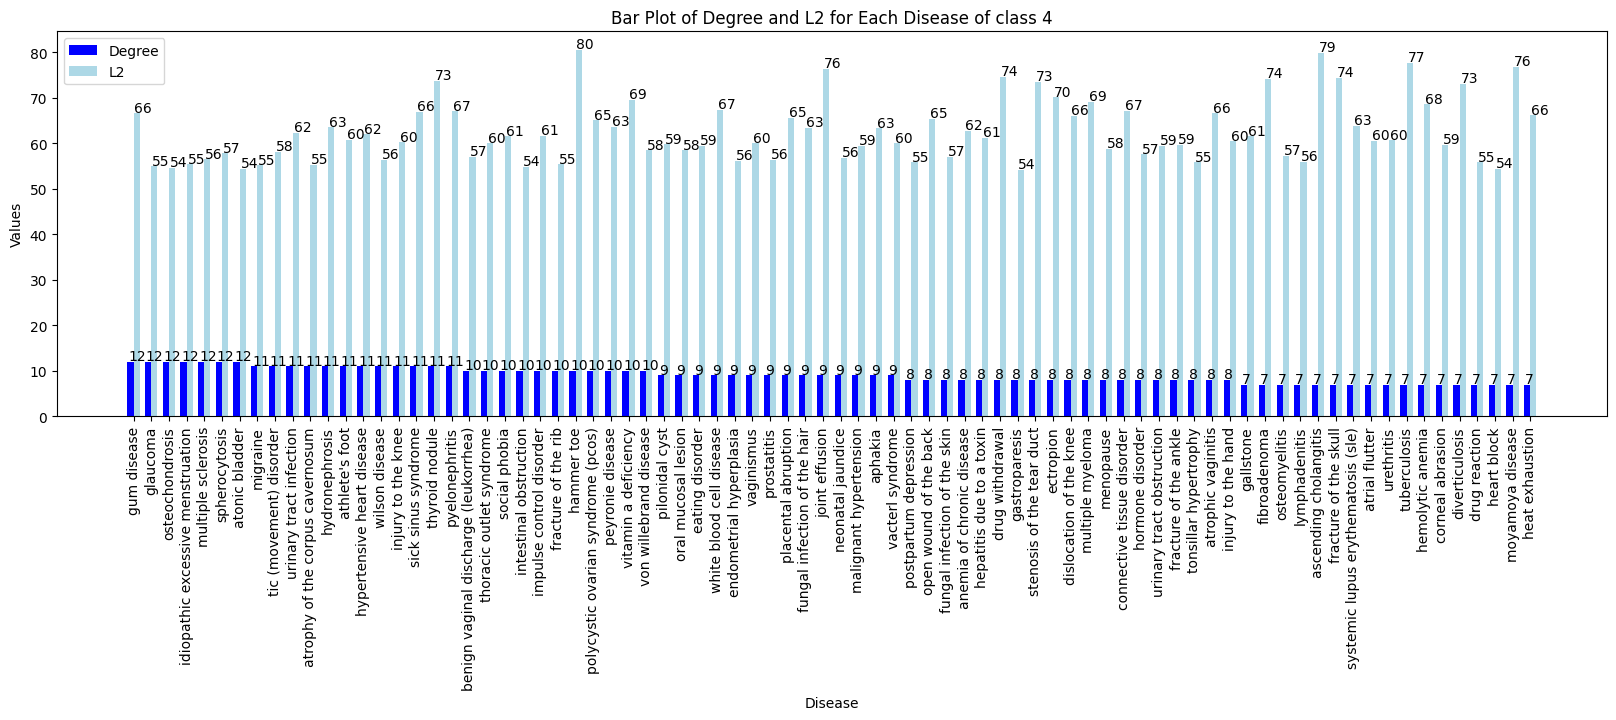

In [17]:
# Get diseases names
names = pd.read_csv("../../dataset/diseases.csv").values[:, 0].tolist()

# set thresholds as hyperparameters
L1_threshold = kd[:, 0].max() * 0.58
L2_threshold = kd[:, 1].max() * 0.58

# class 1: kd[:,0] < L1_threshold and kd[:,1] < L2_threshold
class1_symptoms = np.where((kd[:, 0] < L1_threshold) & (kd[:, 1] < L2_threshold))[0]

# class 2: kd[:,0] < L1_threshold and kd[:,1] > L2_threshold
class2_symptoms = np.where((kd[:, 0] < L1_threshold) & (kd[:, 1] > L2_threshold))[0]

# class 3: kd[:,0] > L1_threshold and kd[:,1] < L2_threshold
class3_symptoms = np.where((kd[:, 0] > L1_threshold) & (kd[:, 1] < L2_threshold))[0]

# class 4: kd[:,0] > L1_threshold and kd[:,1] > L2_threshold
class4_symptoms = np.where((kd[:, 0] > L1_threshold) & (kd[:, 1] > L2_threshold))[0]

# compute the sizes and plot them
sizes = [
    class1_symptoms.shape[0],
    class2_symptoms.shape[0],
    class3_symptoms.shape[0],
    class4_symptoms.shape[0],
]
labels = ["class 1", "class 2", "class 3", "class 4"]
plt.figure(figsize=(10, 5))
plt.bar(labels, sizes, color="blue")
plt.title("Classes sizes")
plt.xlabel("Classes")
plt.ylabel("Sizes")

# investigate most difficult diseases
names_values = {names[i]: (kd[i, 0], kd[i, 1]) for i in class4_symptoms}

# Unpack the tuple into separate columns in the DataFrame
sorted_names = pd.DataFrame(
    names_values.values(), index=names_values.keys(), columns=["Degree", "L2"]
).sort_values(by="Degree", ascending=False)

# Plotting with two bars for each value
fig, ax = plt.subplots(figsize=(20, 5))
bar_width = 0.35
bar_positions = range(len(sorted_names))

degree_bars = ax.bar(
    bar_positions, sorted_names["Degree"], width=bar_width, color="blue", label="Degree"
)
l2_bars = ax.bar(
    [pos + bar_width for pos in bar_positions],
    sorted_names["L2"],
    width=bar_width,
    color="lightblue",
    label="L2",
)

# Add values to each column in the plot
for bars in [degree_bars, l2_bars]:
    for i, v in enumerate(bars):
        plt.text(
            i - 0.3 + (bar_width / 2 if bars == degree_bars else 3 * bar_width / 2),
            v.get_height() + 0.35,
            int(v.get_height()),
            color="black",
            fontsize=10,
        )

# Customize plot
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(
    sorted_names.index, rotation=90
)  # Rotate x-axis tick labels by 90 degrees
ax.set_xlabel("Disease")  # Add xlabel
ax.set_ylabel("Values")  # Add ylabel
ax.set_title("Bar Plot of Degree and L2 for Each Disease of class 4")  # Add title
ax.legend()

# Show the plot
plt.show()